# **QP 2 - Qual o poder preditivo individual das diferentes características dinâmicas coletadas?**

Análise do Information Gain:

Métricas com maior Information Gain:
1. Invokes_with_callback_Normalized: 0.189244
2. InvokesInterval_Greater_Than_100_ms_Raw: 0.155170
3. InvokesInterval_Greater_Than_100_ms_Normalized: 0.141505
4. InvokeFunPre_Count_Raw: 0.131795
5. Unique_Asynchook_ids_Raw: 0.111738

Resumo por grupo:
Grupo 1 - Média: 0.111209, Desvio: 0.034023
Grupo 2 - Média: 0.000007, Desvio: 0.000010

Maior Information Gain geral: Invokes_with_callback_Normalized (0.189244)
Menor Information Gain geral: Random_Col_3 (0.000000)


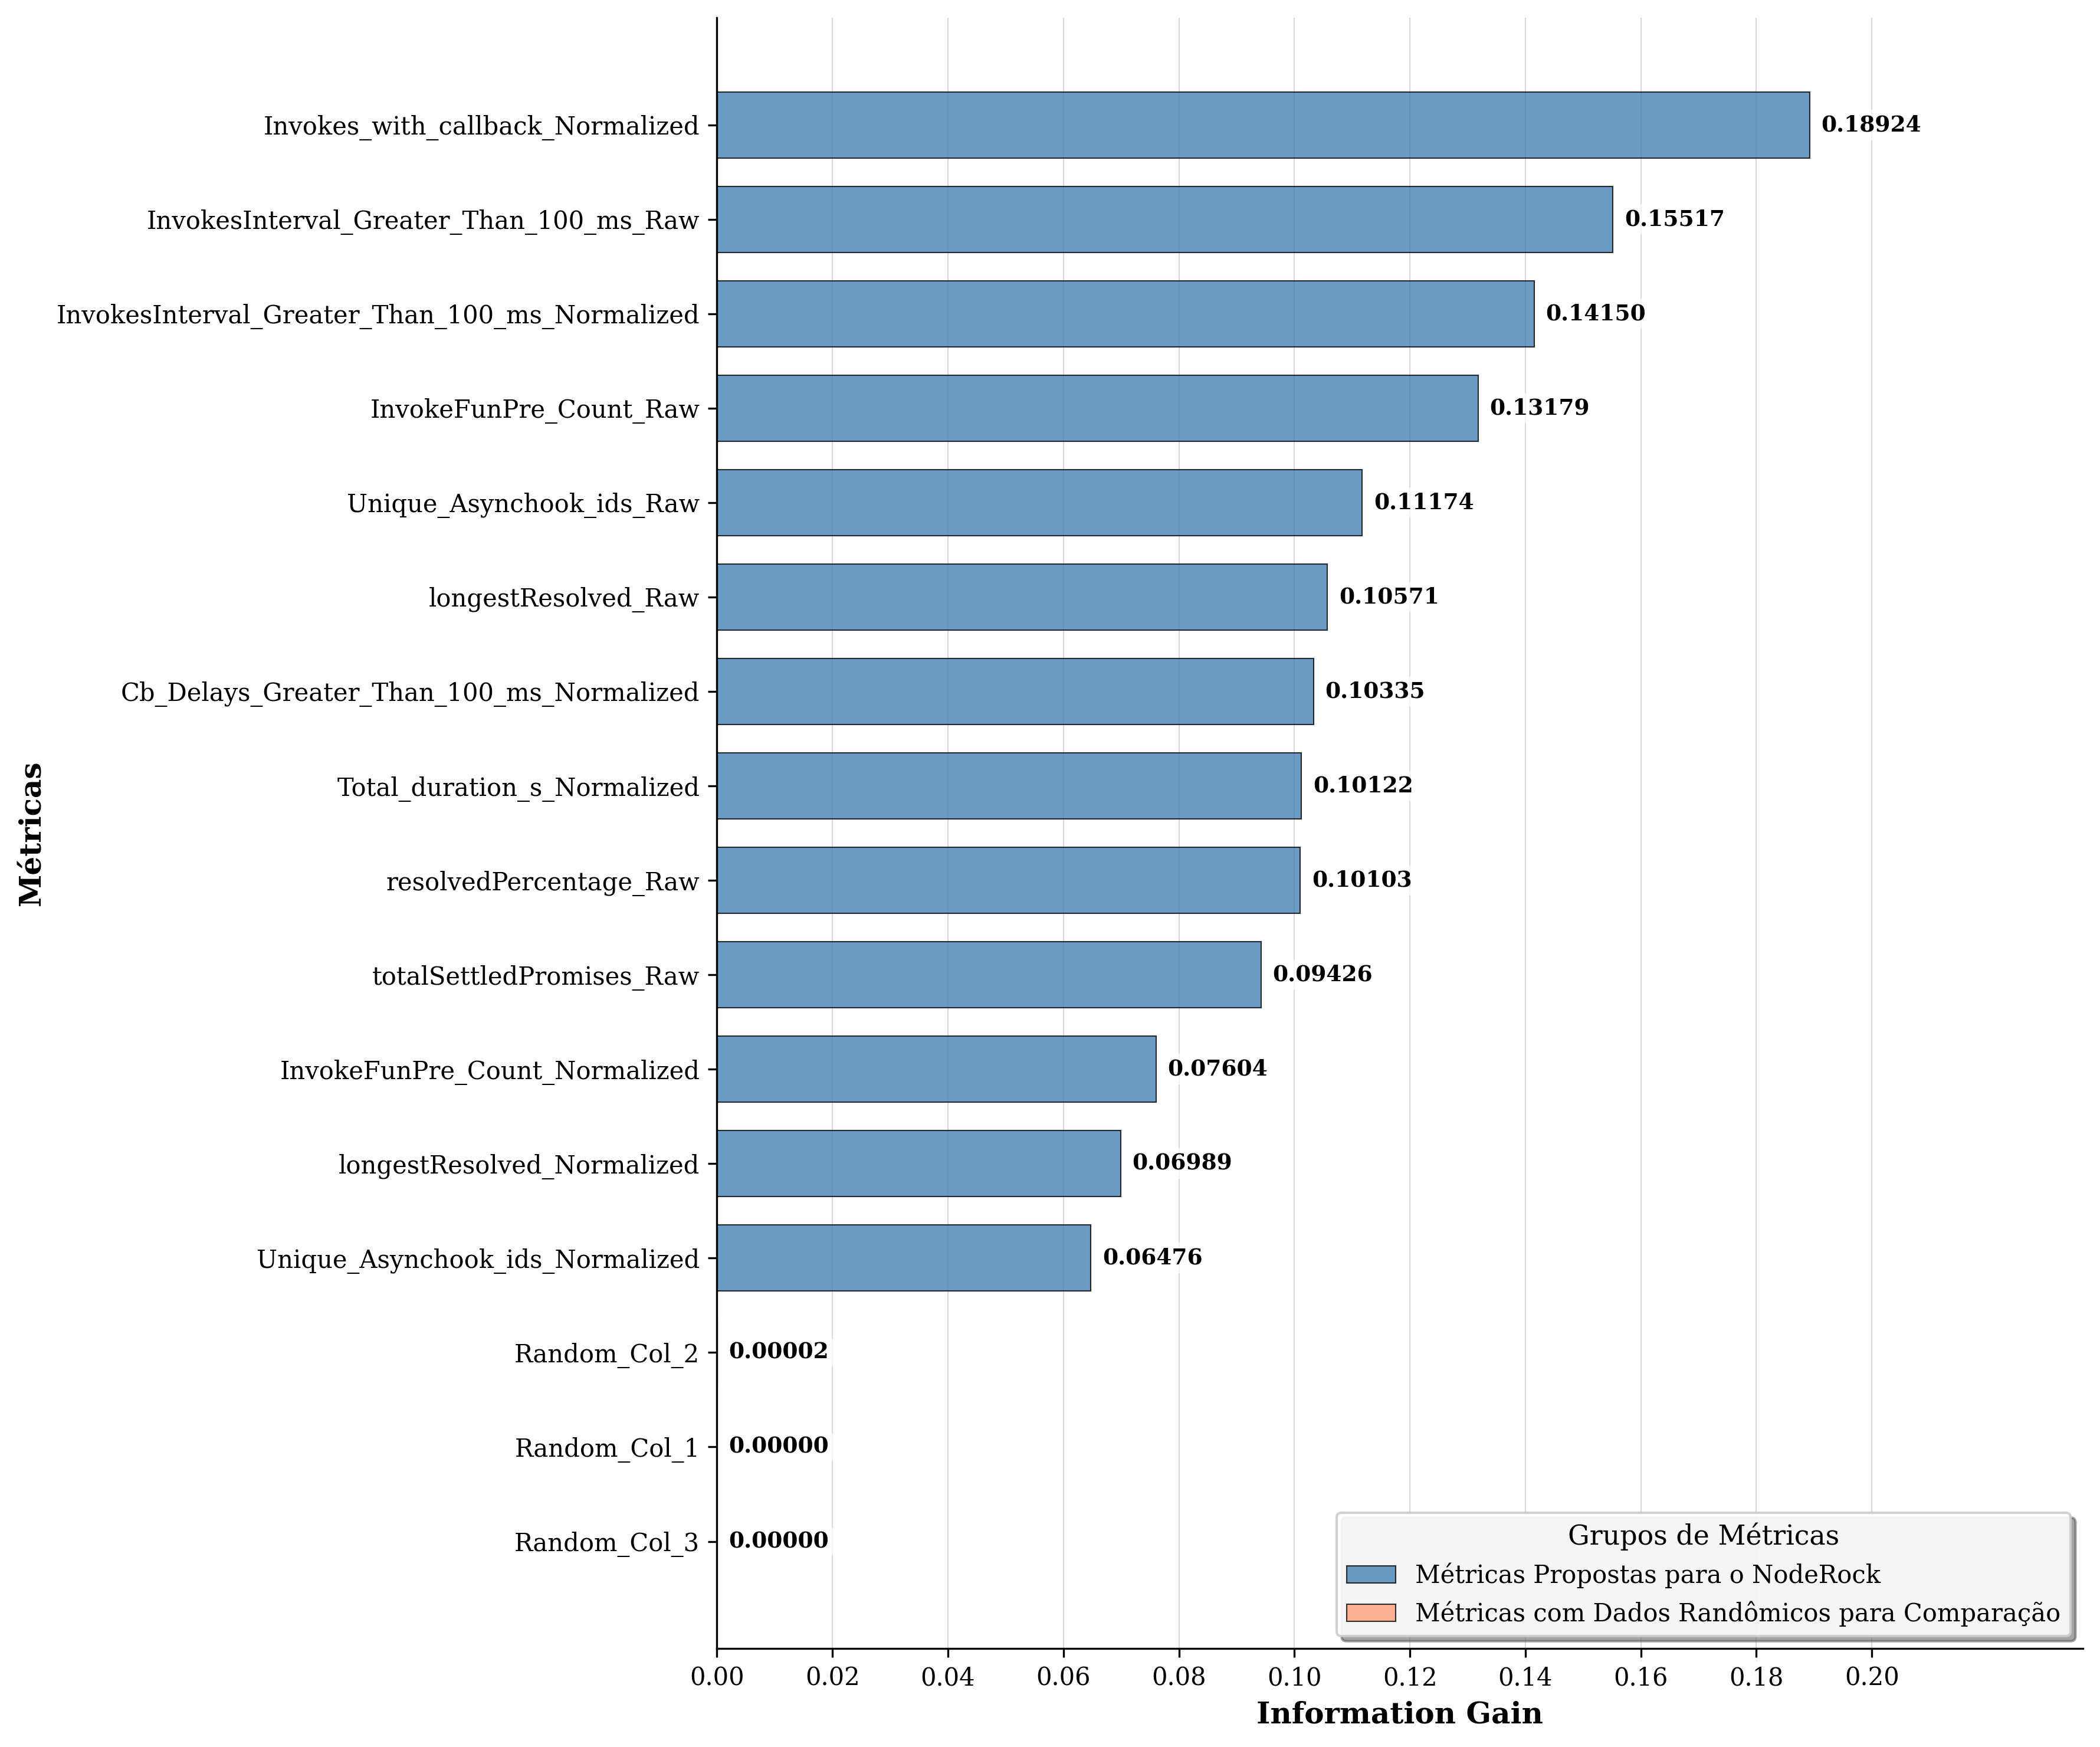

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

plt.style.use('default')
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.alpha'] = 0.3

metrics_group1 = {
    "Invokes_with_callback_Normalized": 0.189244,
    "InvokesInterval_Greater_Than_100_ms_Raw": 0.155170,
    "InvokesInterval_Greater_Than_100_ms_Normalized": 0.141505,
    "InvokeFunPre_Count_Raw": 0.131795,
    "Unique_Asynchook_ids_Raw": 0.111738,
    "longestResolved_Raw": 0.105713,
    "Cb_Delays_Greater_Than_100_ms_Normalized": 0.103349,
    "Total_duration_s_Normalized": 0.101219,
    "resolvedPercentage_Raw": 0.101034,
    "totalSettledPromises_Raw": 0.094263,
    "InvokeFunPre_Count_Normalized": 0.076043,
    "longestResolved_Normalized": 0.069892,
    "Unique_Asynchook_ids_Normalized": 0.064757,
}

metrics_group2 = {
    "Random_Col_2": 0.000021,
    "Random_Col_1": 0.000000,
    "Random_Col_3": 0.000000,
}

all_metrics = {**metrics_group1, **metrics_group2}

cor_grupo1 = '#4682B4'
cor_grupo2 = '#FFA07A'

group_map = {k: cor_grupo1 for k in metrics_group1}
group_map.update({k: cor_grupo2 for k in metrics_group2})

sorted_items = sorted(all_metrics.items(), key=lambda x: x[1], reverse=True)

names = [k for k, v in sorted_items]
values = [v for k, v in sorted_items]
colors = [group_map[k] for k, v in sorted_items]

readable_names = []
for name in names:
    readable = name
    readable_names.append(readable)

fig, ax = plt.subplots(figsize=(12, 10), dpi=300)

bars = ax.barh(range(len(readable_names)), values,
               color=colors,
               edgecolor='black',
               linewidth=0.5,
               alpha=0.8,
               height=0.7)

ax.set_yticks(range(len(readable_names)))
ax.set_yticklabels(readable_names, fontsize=10)

ax.set_xlabel("Information Gain", fontsize=12, fontweight='bold')
ax.set_ylabel("Métricas", fontsize=12, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=10)

ax.invert_yaxis()

ax.grid(True, axis='x', linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    if spine.get_visible():
        spine.set_linewidth(0.8)
        spine.set_color('black')

legend_elements = [
    Patch(facecolor=cor_grupo1, alpha=0.8, edgecolor='black', linewidth=0.5, label="Métricas Propostas para o NodeRock"),
    Patch(facecolor=cor_grupo2, alpha=0.8, edgecolor='black', linewidth=0.5, label="Métricas com Dados Randômicos para Comparação"),
]

legend = ax.legend(handles=legend_elements,
                  title="Grupos de Métricas",
                  title_fontsize=11,
                  fontsize=10,
                  loc='lower right',
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  framealpha=0.9)

for i, (bar, value) in enumerate(zip(bars, values)):
    width = bar.get_width()
    ax.text(width + 0.002, bar.get_y() + bar.get_height()/2,
            f'{value:.5f}',
            ha='left', va='center',
            fontsize=9,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2',
                     facecolor='white',
                     alpha=0.7,
                     edgecolor='none'))

max_value = max(values)
ax.set_xlim(0, max_value * 1.25)

x_ticks = np.arange(0, max_value * 1.1, 0.02)
ax.set_xticks(x_ticks)

plt.tight_layout()

print("Análise do Information Gain:")
print(f"\nMétricas com maior Information Gain:")
top_5 = sorted_items[:5]
for i, (metric, gain) in enumerate(top_5, 1):
    print(f"{i}. {metric}: {gain:.6f}")

print(f"\nResumo por grupo:")
grupo1_values = [v for k, v in all_metrics.items() if k in metrics_group1]
grupo2_values = [v for k, v in all_metrics.items() if k in metrics_group2]

print(f"Grupo 1 - Média: {np.mean(grupo1_values):.6f}, Desvio: {np.std(grupo1_values):.6f}")
print(f"Grupo 2 - Média: {np.mean(grupo2_values):.6f}, Desvio: {np.std(grupo2_values):.6f}")

print(f"\nMaior Information Gain geral: {readable_names[0]} ({max(values):.6f})")
print(f"Menor Information Gain geral: {readable_names[-1]} ({min(values):.6f})")

# plt.savefig('information_gain_analysis.png', dpi=300, bbox_inches='tight',
#            facecolor='white', edgecolor='none')
# plt.savefig('information_gain_analysis.pdf', bbox_inches='tight',
#            facecolor='white', edgecolor='none')

plt.show()